In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from fbm.sim import naive
bfBm = naive.NaiveBiFBmGenerator()

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'int'

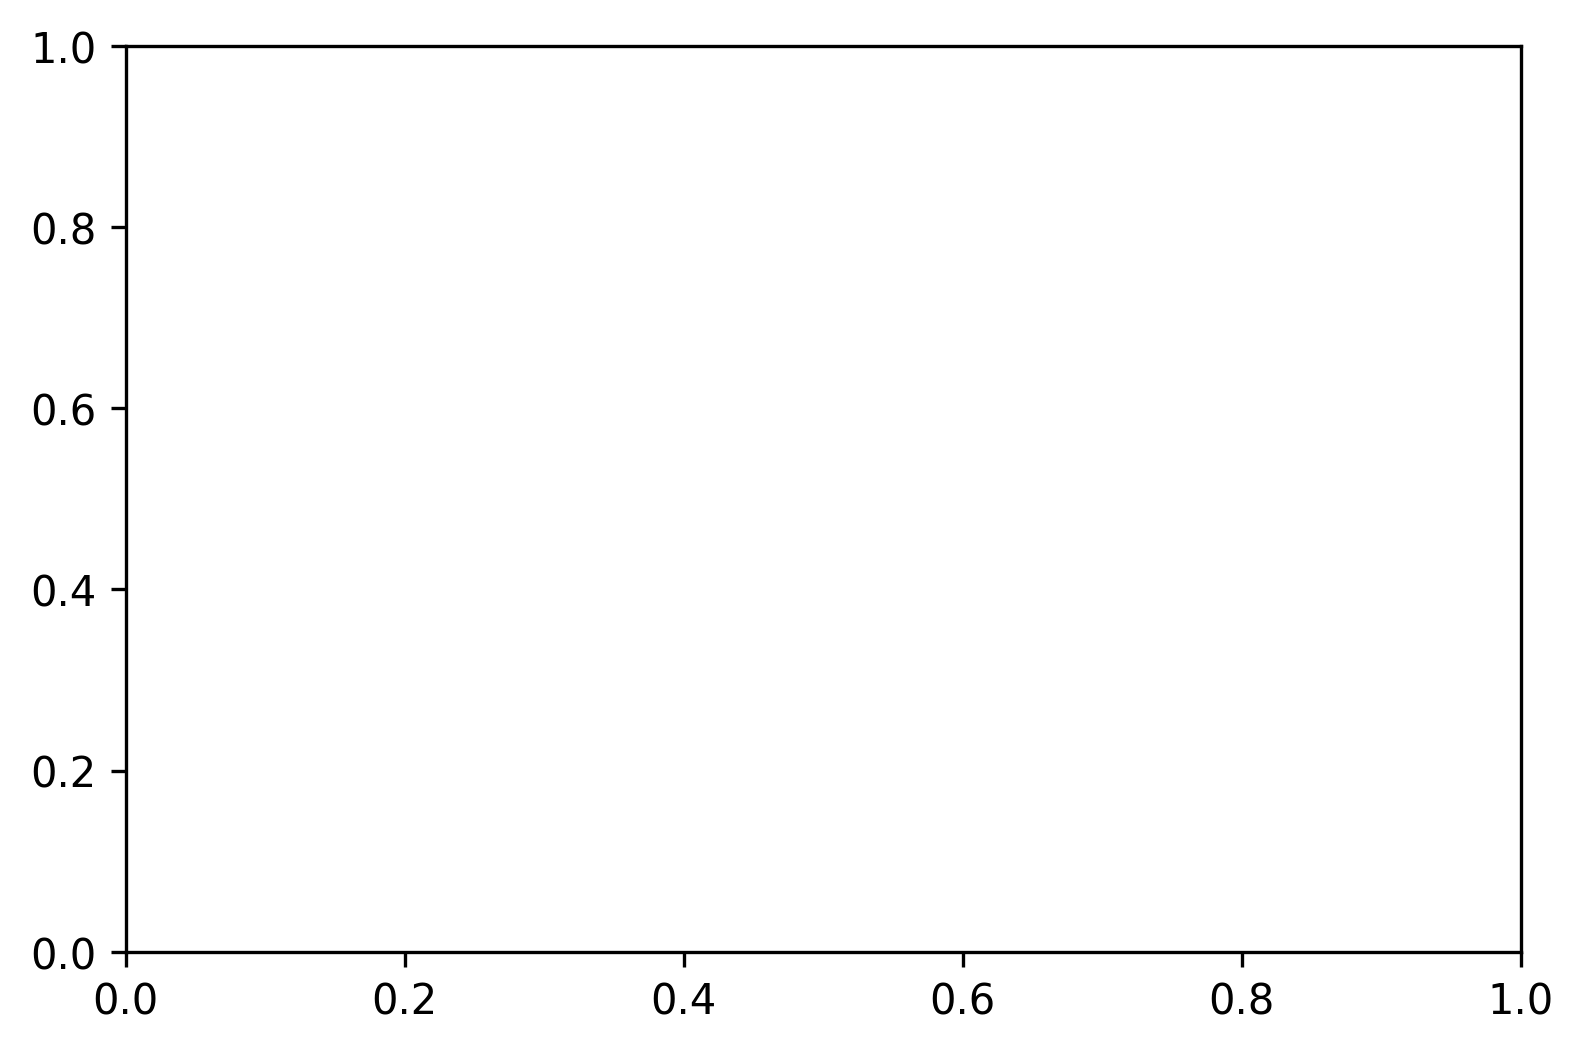

In [12]:
from fbm import utils

xlist = np.linspace(0, 1.0, 1000)
ylist = np.linspace(0, 1.0, 1000)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        if not(X[i][j] == 0 or Y[i][j] == 1 or X[i][j] == 1 or Y[i][j] == 1):
            Z[i][j] = utils.bfBm_max_rho(X[i][j], Y[i][j])
fig,ax=plt.subplots(1,1, dpi=300)
cp = ax.contourf(X, Y, Z, levels=np.arange(0, Z.max, .001))
fig.colorbar(cp) # Add a colorbar to a plot
cp.set_clim(0, 1)
ax.set_title('Maximal correlation vs H1 and H2 \nfor well-balanced mfBm')
ax.set_ylabel('maximal coorelation rho')
plt.show()

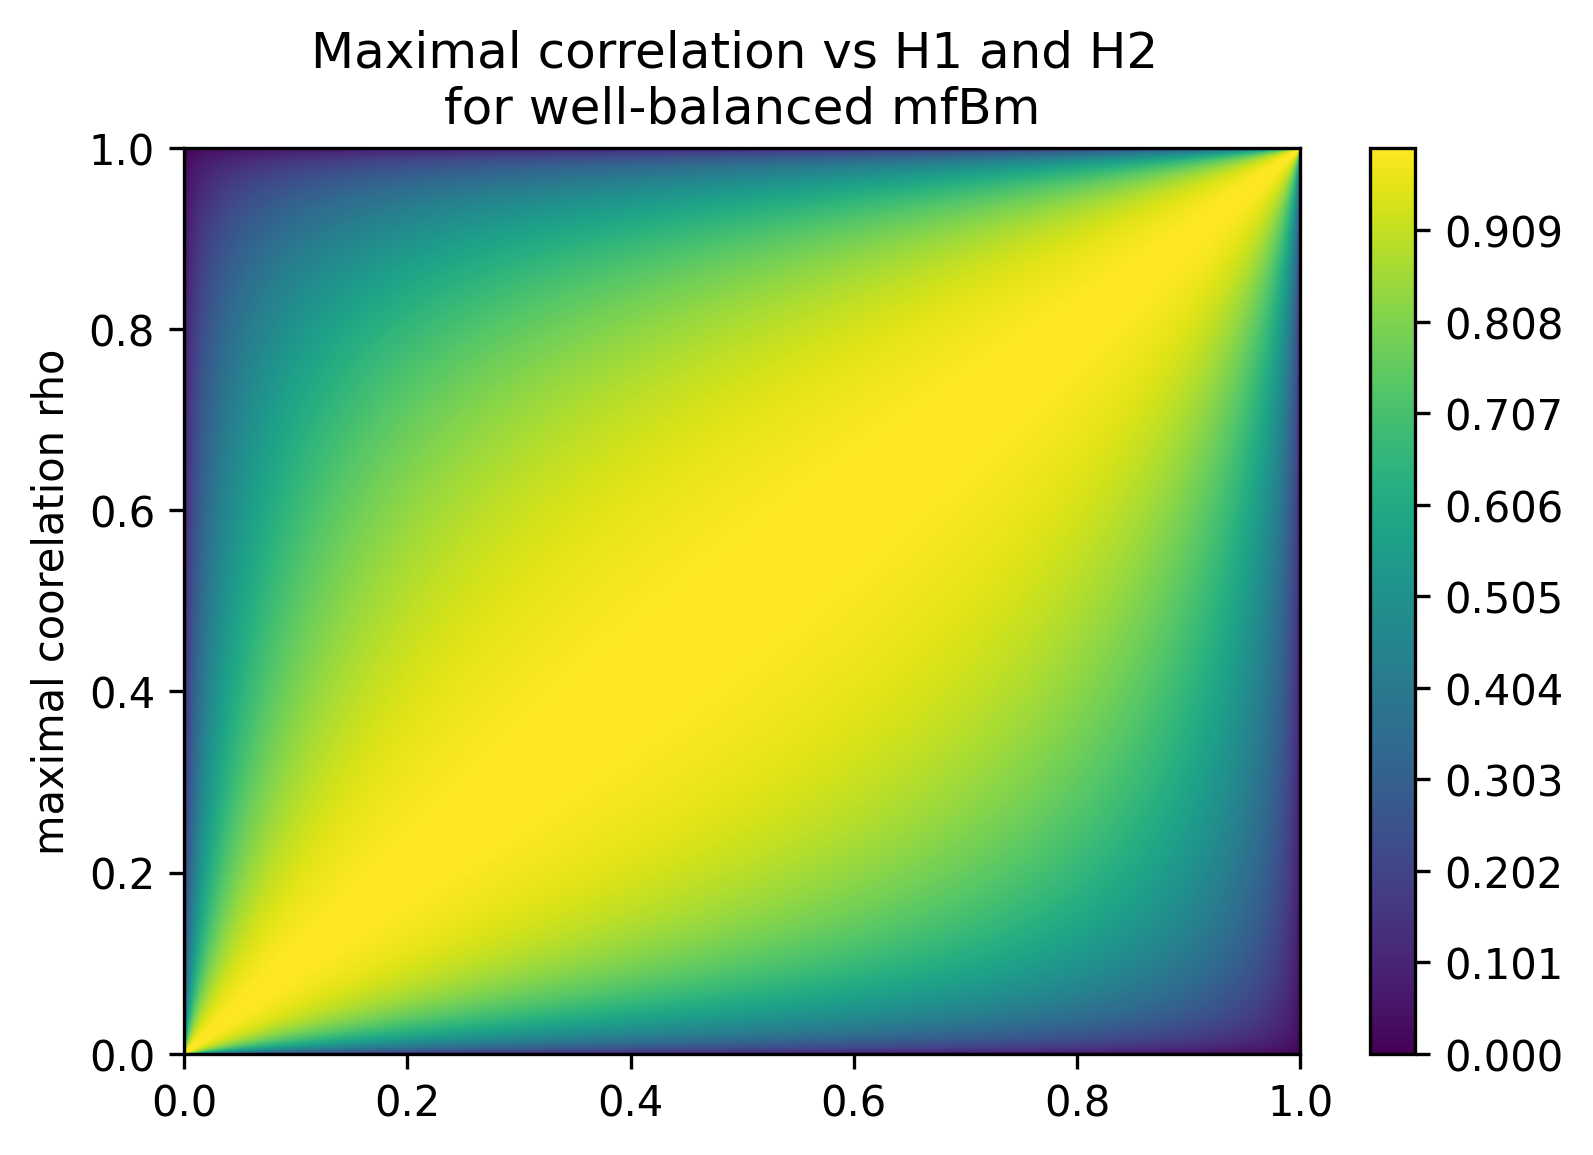

In [15]:
fig,ax=plt.subplots(1,1, dpi=300)
cp = ax.contourf(X, Y, Z, levels=np.arange(0, 1.001, .001))
fig.colorbar(cp) # Add a colorbar to a plot
cp.set_clim(0, 1)
ax.set_title('Maximal correlation vs H1 and H2 \nfor well-balanced mfBm')
ax.set_ylabel('maximal coorelation rho')
plt.show()

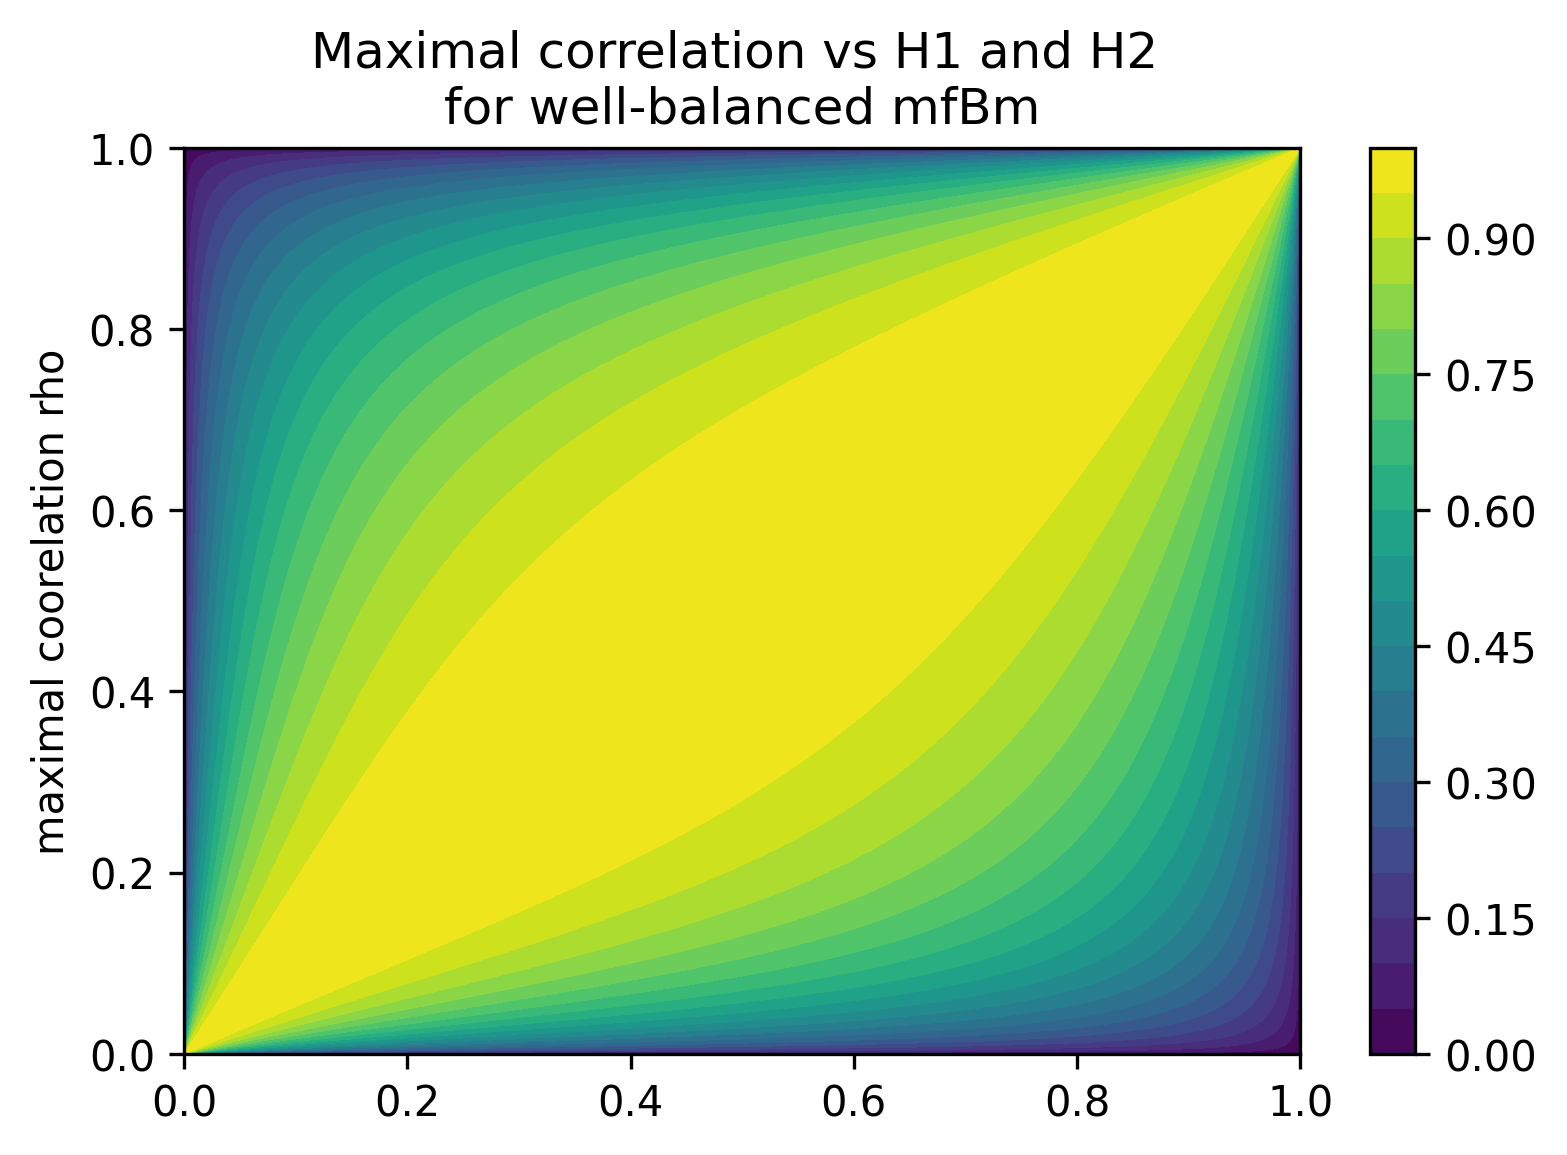

In [18]:
fig,ax=plt.subplots(1,1, dpi=300)
cp = ax.contourf(X, Y, Z, levels=20)
fig.colorbar(cp) # Add a colorbar to a plot
cp.set_clim(0, 1)
ax.set_title('Maximal correlation vs H1 and H2 \nfor well-balanced mfBm')
ax.set_ylabel('maximal coorelation rho')
plt.show()

In [4]:
from fbm import utils

utils.cov(5, 0.1)

array([[ 1.        , -0.42565082, -0.02583289, -0.01162781, -0.00677761],
       [-0.42565082,  1.        , -0.42565082, -0.02583289, -0.01162781],
       [-0.02583289, -0.42565082,  1.        , -0.42565082, -0.02583289],
       [-0.01162781, -0.02583289, -0.42565082,  1.        , -0.42565082],
       [-0.00677761, -0.01162781, -0.02583289, -0.42565082,  1.        ]])

In [5]:
utils.cov_chol(5, 0.1)

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.42565082,  0.90488749,  0.        ,  0.        ,  0.        ],
       [-0.02583289, -0.48254243,  0.87549156,  0.        ,  0.        ],
       [-0.01162781, -0.03401779, -0.50527755,  0.86220774,  0.        ],
       [-0.00677761, -0.01603813, -0.0385464 , -0.51698892,  0.85494648]])

In [9]:

rcs = utils.cov(n=10, H=0.3)
rcs = np.cumsum(rcs, axis=1)
rcs = np.cumsum(rcs, axis=0)
rcs

array([[1.        , 0.75785828, 0.70873274, 0.68210733, 0.66456555,
        0.65181412, 0.6419699 , 0.6340532 , 0.62749528, 0.62193944],
       [0.75785828, 1.51571657, 1.22444931, 1.14869835, 1.10453116,
        1.07423795, 1.05164231, 1.03388138, 1.01940677, 1.00729301],
       [0.70873274, 1.22444931, 1.93318204, 1.61528938, 1.52199664,
        1.46507803, 1.42494059, 1.39442825, 1.37010941, 1.35007895],
       [0.68210733, 1.14869835, 1.61528938, 2.29739671, 1.96196226,
        1.8559181 , 1.78915526, 1.74110113, 1.70403086, 1.67415618],
       [0.66456555, 1.10453116, 1.52199664, 1.96196226, 2.6265278 ,
        2.27834193, 2.16245354, 2.08777401, 2.03316196, 1.99053585],
       [0.65181412, 1.07423795, 1.46507803, 1.8559181 , 2.27834193,
        2.93015605, 2.57212595, 2.44832087, 2.36708341, 2.30691552],
       [0.6419699 , 1.05164231, 1.42494059, 1.78915526, 2.16245354,
        2.57212595, 3.21409585, 2.84814905, 2.71778605, 2.63099276],
       [0.6340532 , 1.03388138, 1.3944282

In [110]:
def cum_sum_error(H, size):
    expected = np.zeros((size, size), dtype=float)
    rho_cum_sum = utils.cov(n=size, H=H)
    rho_cum_sum = np.cumsum(rho_cum_sum, axis=0)
    rho_cum_sum = np.cumsum(rho_cum_sum, axis=1)
    # rcs = np.zeros((size, size))


    for i in range(size):
        for j in range(size):
            if i != 0 and j != 0:
                expected[i][j] = (i**(2*H) + j**(2*H) - abs(i-j)**(2*H)) / 2
            else:
                expected[i][j] = 1
            
    error = np.zeros((size, size), dtype=float)
    error = (expected - rho_cum_sum) / expected
    error = np.abs(error)
    error[0,:] = 0
    error[:,0] = 0

    return error

In [24]:
cum_sum_error(0.9, 10)

In [126]:
size = 100
size += 1
xlist = np.arange(1, size)
ylist = np.arange(1, size)
X, Y = np.meshgrid(xlist, ylist)

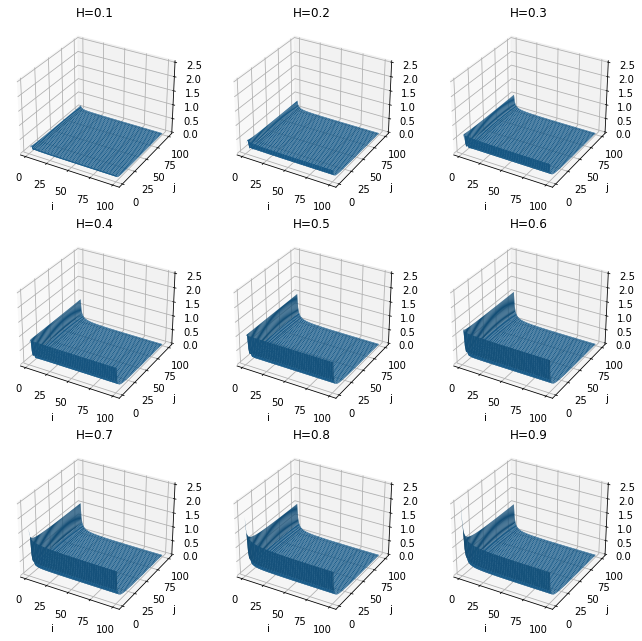

In [131]:
from matplotlib import colors
from matplotlib import cm


fig = plt.figure(figsize=(11,11))
for i in range(1,10):
    ax=fig.add_subplot(3,3,i, projection='3d')
    ax.set_zlim(0, 2.5)
    im = ax.plot_surface(X, Y, cum_sum_error(i*0.1, size)[1:,1:])
    ax.set_title(f'H=0.{i}')
    ax.set_xlabel('i')
    ax.set_ylabel('j')

plt.show()

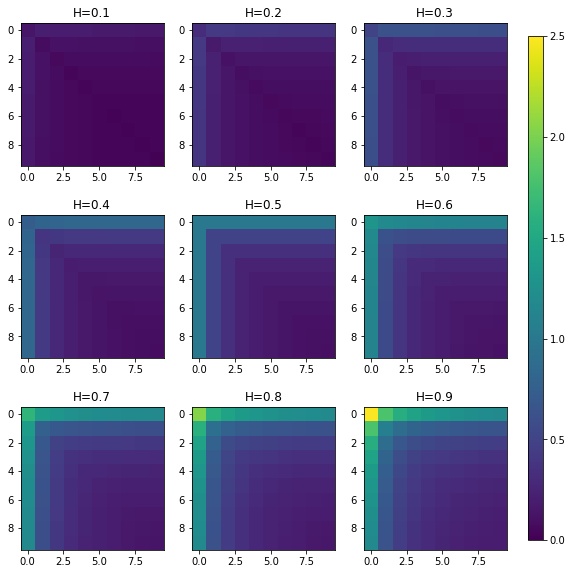

In [132]:
from matplotlib import colors
from matplotlib import cm

size = 11
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i in range(1,10):
    j = i-1
    im = axes[j // 3][j % 3].imshow(cum_sum_error(i*0.1, size)[1:,1:], vmin=0, vmax=2.5)
    axes[j // 3][j % 3].set_title(f'H=0.{i}')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)
plt.show()